In [51]:
# Setting up the environment.
import numpy as np
import pandas as pd
from scipy import stats
import plotly as pl

In [131]:
# Load the data from the John Hopkins github repo
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-02-2020.csv', index_col=0)

In [132]:
# Dropping some columns and sorting

df1 = df[["Admin2", "Province_State", "Country_Region", "Confirmed", "Deaths", "Combined_Key"]] #getting the columns I want
df1 = df1[df1['Confirmed'] !=0] #dropping States with 0 confirmed
df1 = df1[(df1["Country_Region"] == "US")] #dropping countries other than the US
df1 = df1.sort_values(by=['Province_State','Confirmed'], ascending=True) #sorting by State and then Confirmed
df1 = df1.dropna() #dropping NA values
df1 = df1[df1.Province_State != 'Wuhan Evacuee'] #dropping this row because it is not US
df1['Combined_Key'] = df1['Combined_Key'].str.replace(r', US', '') #removing US from Combined key so it looks better in the hover text
#df1 = df1.groupby(['Province_State'])
df1 = df1.reset_index() #resetting index so FIPS is not the index
df1 = df1.rename(columns={'Province_State': 'State'})
df1 = df1.rename(columns={'Admin2': 'County'})
df1 = df1.rename(columns={'Country_Region': 'Country'})
df1 = df1.rename(columns={'Combined_Key': 'County/State'})
df1.head(5)

,FIPS,County,State,Country,Confirmed,Deaths,County/State
0,1013.0,Butler,Alabama,US,1,0,"Butler, Alabama"
1,1031.0,Coffee,Alabama,US,1,0,"Coffee, Alabama"
2,1035.0,Conecuh,Alabama,US,1,0,"Conecuh, Alabama"
3,1041.0,Crenshaw,Alabama,US,1,0,"Crenshaw, Alabama"
4,1045.0,Dale,Alabama,US,1,0,"Dale, Alabama"


In [ ]:
import plotly.express as px
fig = px.treemap(df1, path=['State', 'County'], 
                 values='Confirmed',
                 names='State',
                 hover_name="County/State", 
                 #hover_data=["Confirmed", "Deaths","County/State"],
                
                 labels={'County', 'Confirmed'},
                 #title='Number of confirmed COVID19 cases'
                )

fig.update_layout(uniformtext=dict(minsize=18, mode=False),
                 hoverlabel=dict(bgcolor='white', bordercolor='black',
                      font=dict(family='Arial',
                          size=18,
                          color='darkgray')
                             ),
)

fig.show()

import plotly.io as pio
pio.write_html(fig, file='Index.html', auto_open=True)

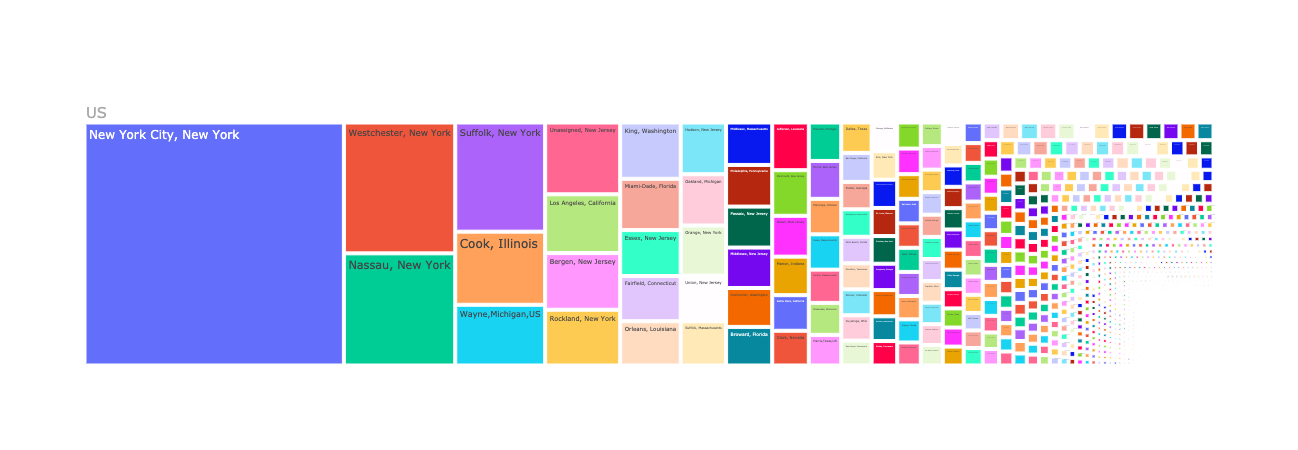

In [129]:
import plotly.graph_objects as go

labels = df1['County/State']
parents = df1['Country']
values = df1['Confirmed']
deaths = df1['Deaths']

fig = go.Figure(go.Treemap(
    labels = labels,
    values = values,
    parents = parents,
    #hoverinfo = 'label+text',
    textinfo = 'label+text',
    hovertemplate = '<b>Location</b>: %{label}'
                    '<br><b>Confirmed</b>: %{Confirmed}<br>'
                    '<b>Deaths</b>: %{Deaths}',
    hoverlabel=dict(bgcolor='white',
                    bordercolor='black',
                font=dict(family='Arial',
                          size=20,
                          color='darkgray')
                             ),
    outsidetextfont = {"size": 30, "color": "darkgray"},
    
    #Insidetextfont = {"size": 20}
    ))
                
#fig.update_layout(treemapcolorway = ["pink", "lightgray"])

fig.show()